## Suicide Rate and Socioecomic Indicators by Country

Suicide has become a huge challenge to public mental health in every country. With regard to suicide prevention, it is crucial to identify whether any particular sociodemographic characteristics, such as income inequality, poverty, and unemployment rate, correlate with the high number of suicide rates. The relation between suicide rate and socio-economic indicators are explored in this analysis.

In [1]:
import os
import sys
sys.path.append(os.path.abspath(".."))

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from common_lib.data_reader import SuicideRawData, SuicideDataReader

### Suicide Rate and Income Inequality (GINI)

In [2]:
#load the socioeconomic indicators to a data.frame
#SuicideDataReader is a defined class/module to read the data from the data sources
reader = SuicideDataReader()
socioeconomic = reader.read_data(SuicideRawData.SOCIOECONOMIC)
socioeconomic

,country,country_code,gini_latest_year,gini_coef,poverty_latest_year,poverty_199,poverty_320
0,Albania,ALB,2012,29.0,2017,1.3,8.2
1,Algeria,DZA,2011,27.6,2011,0.4,3.7
2,Angola,AGO,2008,42.7,2018,51.8,73.2
3,Argentina,ARG,2014,42.7,2018,1.3,3.9
4,Armenia,ARM,2015,32.4,2018,1.4,9.4
...,...,...,...,...,...,...,...
138,Uzbekistan,UZB,2003,35.3,2003,61.6,86.2
139,Vanuatu,VUT,2010,37.3,2010,13.2,39.4
140,Vietnam,VNM,2014,34.8,2018,1.9,6.8
141,Zambia,ZMB,2015,57.1,2015,58.7,75.4


In [3]:
#load the suicide rate to a data.frame
#SuicideDataReader is a defined class/module to read the data from the data sources
suiciderate = reader.read_data(SuicideRawData.SUICIDE_RATES, tidy = True)

#select "both sexes" only as no need to analyze by sex at the moment
suiciderate_bothsexes = suiciderate[suiciderate["sex"] == "Both sexes"]

#calculate the total number of suicide for all ages
suiciderate_bothsexes_allages = suiciderate_bothsexes.groupby("country", as_index = False)["suicide_rate"].sum()
suiciderate_bothsexes_allages

,country,suicide_rate
0,Afghanistan,93.2
1,Albania,65.1
2,Algeria,38.8
3,Angola,165.8
4,Antigua and Barbuda,8.1
...,...,...
178,Venezuela (Bolivarian Republic of),43.3
179,Viet Nam,89.4
180,Yemen,92.1
181,Zambia,204.9


In [4]:
#join both data frame for plotting purposes
suiciderate_socioeconomic = suiciderate_bothsexes_allages.merge(socioeconomic, on="country")

#classify GINI index into Low, High, and Severe 
#(based on classification from WorldBank: ...)
def gini_classification(gini):
    '''Classify the countries based on GINI coefficient that represent the severity of inequality in a particular country
    
       Parameter:
           gini (decimal) : gini coefficient
        
       Return:
           country classification that comprise of low, high, and severe inequality
    '''
    if (gini < 40):
        return "Low Inequality"
    elif (gini >= 40 and gini < 50):
        return "High Inequality"
    else:
        return "Severe Inequality"
    
suiciderate_socioeconomic = suiciderate_socioeconomic.\
    assign(gini_class = lambda x: x["gini_coef"].map(lambda y: gini_classification(y)))

suiciderate_socioeconomic

,country,suicide_rate,country_code,gini_latest_year,gini_coef,poverty_latest_year,poverty_199,poverty_320,gini_class
0,Albania,65.1,ALB,2012,29.0,2017,1.3,8.2,Low Inequality
1,Algeria,38.8,DZA,2011,27.6,2011,0.4,3.7,Low Inequality
2,Angola,165.8,AGO,2008,42.7,2018,51.8,73.2,High Inequality
3,Argentina,91.4,ARG,2014,42.7,2018,1.3,3.9,High Inequality
4,Armenia,84.9,ARM,2015,32.4,2018,1.4,9.4,Low Inequality
...,...,...,...,...,...,...,...,...,...
128,Uruguay,191.0,URY,2015,41.7,2018,0.1,0.4,High Inequality
129,Uzbekistan,64.6,UZB,2003,35.3,2003,61.6,86.2,Low Inequality
130,Vanuatu,78.8,VUT,2010,37.3,2010,13.2,39.4,Low Inequality
131,Zambia,204.9,ZMB,2015,57.1,2015,58.7,75.4,Severe Inequality


<function matplotlib.pyplot.show(close=None, block=None)>

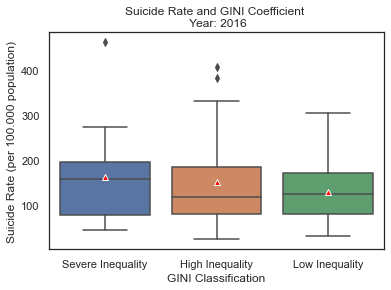

In [5]:
#plotting
sns.set_theme(style="white")

#plot suicide rate with GINI coefficient
sns.boxplot(data = suiciderate_socioeconomic, 
            x = "gini_class", 
            y = "suicide_rate", 
            order = ["Severe Inequality","High Inequality","Low Inequality"],
            showmeans = True,
            meanprops = {"markerfacecolor":"red", "markeredgecolor":"white"})
plt.title("Suicide Rate and GINI Coefficient \n Year: 2016")
plt.xlabel("GINI Classification")
plt.ylabel("Suicide Rate (per 100.000 population)")

plt.show

### Suicide Rate and Poverty

<function matplotlib.pyplot.show(close=None, block=None)>

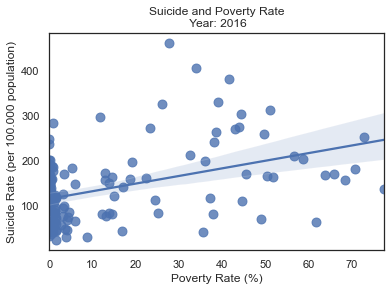

In [6]:
#plotting
sns.set_theme(style="white")

#plot suicide rate with poverty rate by country
sns.regplot(data = suiciderate_socioeconomic, x = "poverty_199", y = "suicide_rate", scatter_kws={"s": 80})
plt.title("Suicide and Poverty Rate\n Year: 2016")
plt.ylabel("Suicide Rate (per 100.000 population)")
plt.xlabel("Poverty Rate (%)")

plt.show